# Plot Spectra

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                # '/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

In [2]:
import postproengine as ppeng
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
yamlstring="""
globalattributes:
  verbose: True
  udfmodules: 
  - spectrapoints.py
  executeorder:
  - windspectra
  - plotcsv

windspectra:
- name: spectra1
  ncfile: /gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD/post_processing/sampling_40000.nc
  group: p_bot
  pointlocationfunction: spectrapoints.getptlist
  csvfile: amrspectra1.csv
  kaimal:
    ustarsource: ablstatsfile
    ablstatsfile:  /gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD/post_processing/abl_statistics40000.nc
    avgt: [20000, 25000]
    #ustar: 0.289809
    csvfile: amrkaimal1.csv
    z: 26.5
    
plotcsv:
  - name: plotSuu
    xlabel: 'f [Hz]'
    ylabel: '$f S_{uu}/U^2$'
    xscale: log
    yscale: log
    title: 'Suu'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'amrspectra1.csv', 'xcol':'f', 'ycol':'Suu', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'amrkaimal1.csv',  'xcol':'f', 'ycol':'Suu', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'Kaimal'}}
  - name: plotSvv
    xlabel: 'f [Hz]'
    ylabel: '$f S_{vv}/U^2$' 
    xscale: log
    yscale: log
    title: 'Svv'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'amrspectra1.csv', 'xcol':'f', 'ycol':'Svv', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'amrkaimal1.csv',  'xcol':'f', 'ycol':'Svv', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'Kaimal'}}     
  - name: plotSww
    xlabel: 'f [Hz]'
    ylabel: '$f S_{ww}/U^2$' 
    xscale: log
    yscale: log
    title: 'Sww'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'amrspectra1.csv', 'xcol':'f', 'ycol':'Sww', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'amrkaimal1.csv',  'xcol':'f', 'ycol':'Sww', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'Kaimal'}}      
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized windspectra
Running windspectra
Initialized kaimal inside windspectra========================] 100.0% 
Executing kaimal
ustar =  0.28583031752984733
Initialized plotcsv
Running plotcsv


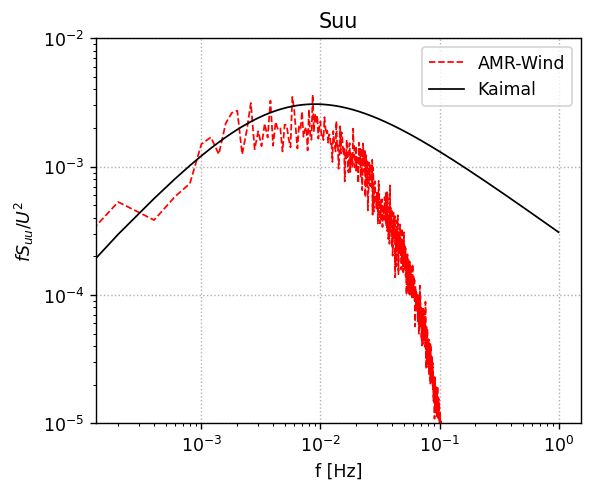

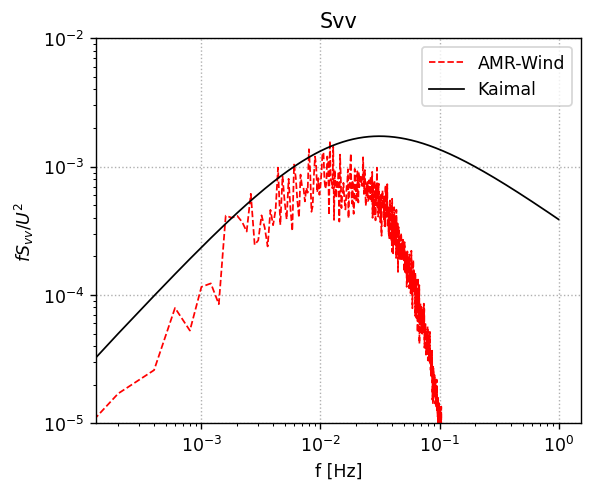

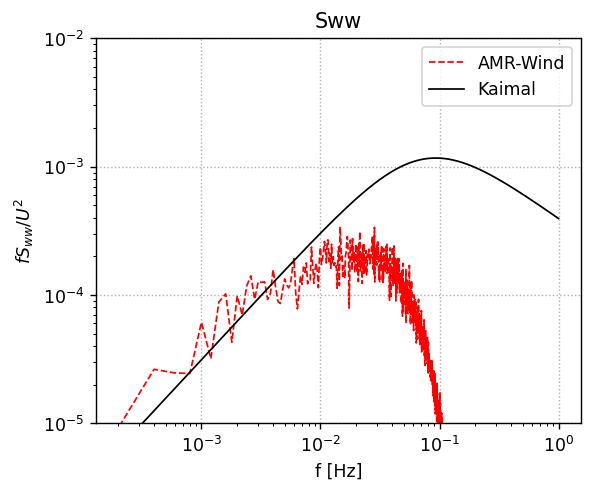

In [4]:
# Run the driver
ppeng.driver(yamldict)